# Anomaly Detection with AutoEncoders

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# โหลดข้อมูลที่ clean แล้ว
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Stroke Prediction/healthcare-dataset-stroke-data-cleaned.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [12]:
# ตรวจสอบ na ในข้อมูล
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# เปลี่ยน data type ของ column
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
dtypes: float64(3), object(8)
memory usage: 421.9+ KB


In [15]:
df_cat  = pd.get_dummies(df.select_dtypes('object') , drop_first=True)
df_cat

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0,0,0,1,0,1,0,0,1,0,0,1,1
3,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,1,0,0,1,0,1,0,0,0,1,0,0,0


In [16]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     4908 non-null   uint8
 1   hypertension_1                  4908 non-null   uint8
 2   heart_disease_1                 4908 non-null   uint8
 3   ever_married_Yes                4908 non-null   uint8
 4   work_type_Never_worked          4908 non-null   uint8
 5   work_type_Private               4908 non-null   uint8
 6   work_type_Self-employed         4908 non-null   uint8
 7   work_type_children              4908 non-null   uint8
 8   Residence_type_Urban            4908 non-null   uint8
 9   smoking_status_formerly smoked  4908 non-null   uint8
 10  smoking_status_never smoked     4908 non-null   uint8
 11  smoking_status_smokes           4908 non-null   uint8
 12  stroke_1                        4908 non-null   uint8
dtypes: 

In [17]:
df_num = df.select_dtypes('number')
df_num

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4903,13.0,103.08,18.6
4904,81.0,125.20,40.0
4905,35.0,82.99,30.6
4906,51.0,166.29,25.6


In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4908 non-null   float64
 1   avg_glucose_level  4908 non-null   float64
 2   bmi                4908 non-null   float64
dtypes: float64(3)
memory usage: 115.2 KB


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
df_num_scaler = StandardScaler().fit_transform(df_num)
df_num_scaler

array([[ 1.06993757,  2.77779723,  0.98114481],
       [ 1.64633634,  0.01401584,  0.45908589],
       [ 0.27184695,  1.48426559,  0.70101563],
       ...,
       [-0.34889019, -0.50218118,  0.21715615],
       [ 0.36052369,  1.37305699, -0.41950107],
       [ 0.05015511, -0.45062901, -0.3431022 ]])

In [21]:
df_num_scaler_final = pd.DataFrame(df_num_scaler, columns=df_num.columns, index=df_num.index)
df_num_scaler_final

,age,avg_glucose_level,bmi
0,1.069938,2.777797,0.981145
1,1.646336,0.014016,0.459086
2,0.271847,1.484266,0.701016
3,1.601998,1.549325,-0.623231
4,1.690675,1.821493,0.013426
...,...,...,...
4903,-1.324334,-0.049918,-1.310821
4904,1.690675,0.448045,1.414072
4905,-0.348890,-0.502181,0.217156
4906,0.360524,1.373057,-0.419501


In [22]:
df_final = pd.concat([df_num_scaler_final, df_cat],axis=1) # axis=1 จะเป็นการต่อในแนวนอน
df_final

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0,0


In [23]:
y = df_final['stroke_1']
X = df_final.drop('stroke_1', axis=1)

In [24]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    0
4907    0
Name: stroke_1, Length: 4908, dtype: uint8

In [25]:
X

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=555
)

In [28]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2807,-0.304552,-0.034610,-0.228504,0,0,0,1,0,1,0,0,0,0,1,0
3578,-0.969627,0.473933,-0.253970,0,0,0,1,0,1,0,0,1,0,1,0
1659,1.468983,-0.072430,0.268089,0,1,1,1,0,1,0,0,0,0,0,1
1202,-1.013966,-0.196245,1.834265,1,0,0,0,0,1,0,0,1,0,1,0
1508,-1.324334,-0.138840,-0.776029,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.715231,0.101812,-0.661431,0,0,0,1,0,1,0,0,1,0,1,0
1430,1.513321,-0.585250,-0.317636,0,0,0,1,0,1,0,0,1,0,0,0
2628,-0.082860,-0.433745,-0.317636,0,0,0,0,0,1,0,0,1,0,1,0
1057,0.981261,2.593875,1.057544,0,0,0,1,0,0,1,0,0,0,0,1


In [29]:
y_train.value_counts()

0    3293
1     142
Name: stroke_1, dtype: int64

In [30]:
X_test

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1332,-1.368673,-0.422039,-0.304903,0,0,0,0,0,0,0,1,1,0,0,0
1767,0.537877,-0.941613,-0.139372,0,0,0,1,0,1,0,0,0,0,0,0
236,-0.215875,-0.175759,-0.253970,0,0,0,0,0,1,0,0,0,0,1,0
331,-0.880951,-0.300025,-0.928827,0,0,0,1,0,1,0,0,0,1,0,0
4393,-1.882998,-0.442300,-1.463619,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.094493,-0.643331,0.026159,1,0,0,1,0,1,0,0,1,0,0,0
3740,-0.260213,0.051386,-0.457701,1,0,0,1,0,0,0,0,0,0,1,0
2595,-1.146981,-0.376565,0.280822,0,0,0,0,1,0,0,0,0,0,1,0
2459,1.646336,-0.053970,-0.279436,0,0,0,1,0,1,0,0,0,0,0,0


In [31]:
y_test.value_counts()

0    1406
1      67
Name: stroke_1, dtype: int64

In [33]:
# เลือกเฉพาะ class 0 = ไม่เป็น Stroke หรือ Normal เพราะเราจะเอาแค่ class 0 เข้า model
train_index = y_train[y_train==0].index
train_data = X_train.loc[train_index]

In [34]:
train_index

Int64Index([2807, 3578, 1659, 1202, 1508, 2362, 2420, 4598, 3309, 4690,
            ...
            2517, 3658, 3670, 1108,  608,  233, 1430, 2628, 1057, 4782],
           dtype='int64', length=3293)

In [38]:
train_data

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2807,-0.304552,-0.034610,-0.228504,0,0,0,1,0,1,0,0,0,0,1,0
3578,-0.969627,0.473933,-0.253970,0,0,0,1,0,1,0,0,1,0,1,0
1659,1.468983,-0.072430,0.268089,0,1,1,1,0,1,0,0,0,0,0,1
1202,-1.013966,-0.196245,1.834265,1,0,0,0,0,1,0,0,1,0,1,0
1508,-1.324334,-0.138840,-0.776029,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.715231,0.101812,-0.661431,0,0,0,1,0,1,0,0,1,0,1,0
1430,1.513321,-0.585250,-0.317636,0,0,0,1,0,1,0,0,1,0,0,0
2628,-0.082860,-0.433745,-0.317636,0,0,0,0,0,1,0,0,1,0,1,0
1057,0.981261,2.593875,1.057544,0,0,0,1,0,0,1,0,0,0,0,1


## Modeling

In [42]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model, Sequential

https://www.analyticsvidhya.com/blog/2021/05/anomaly-detection-using-autoencoders-a-walk-through-in-python/

In [43]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [49]:
model = AutoEncoder(output_units=train_data.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    train_data,
    train_data,
    epochs=100,
    batch_size=512,
    validation_data=(X_test, X_test), verbose=1
)

Epoch 1/100
7/7 [==============================] - 4s 176ms/step - loss: 0.1459 - mse: 0.4500 - val_loss: 0.1445 - val_mse: 0.4463
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1430 - mse: 0.4435 - val_loss: 0.1404 - val_mse: 0.4375
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1369 - mse: 0.4309 - val_loss: 0.1309 - val_mse: 0.4181
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1239 - mse: 0.4049 - val_loss: 0.1122 - val_mse: 0.3824
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1049 - mse: 0.3690 - val_loss: 0.0943 - val_mse: 0.3486
Epoch 6/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0940 - mse: 0.3465 - val_loss: 0.0905 - val_mse: 0.3399
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0912 - mse: 0.3427 - val_loss: 0.0868 - val_mse: 0.3371
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0883 - mse: 0.3

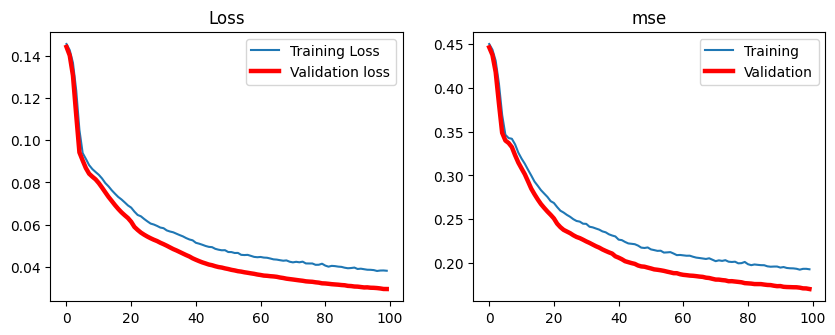

In [50]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('mse')

plt.plot(history.history['mse'], label='Training')
plt.plot(history.history['val_mse'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

In [51]:
import tensorflow as tf

# กำหนด Threshold
def find_threshold(model, train_data):
  reconstructions = model.predict(train_data)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, train_data)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

In [52]:
threshold = find_threshold(model, train_data)
threshold

103/103 [==============================] - 0s 3ms/step


0.052103310498128885

In [53]:
def get_predictions(model, X_test, threshold):
  predictions = model.predict(X_test)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, X_test)
  # 0 = no stroke(normal), 1 = stroke(anomaly)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

In [54]:
from sklearn.metrics import accuracy_score
preds = get_predictions(model, X_test, threshold)
accuracy_score(preds, y_test)

47/47 [==============================] - 0s 7ms/step


0.8282416836388323

In [60]:
y_test.value_counts()

0    1406
1      67
Name: stroke_1, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, preds)

# แสดง Confusion Matrix
print("Confusion Matrix:")
print(cm)

# แสดง Classification Report
print("\nClassification Report:")
print(classification_report(y_test, preds))


Confusion Matrix:
[[1193  213]
 [  40   27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1406
           1       0.11      0.40      0.18        67

    accuracy                           0.83      1473
   macro avg       0.54      0.63      0.54      1473
weighted avg       0.93      0.83      0.87      1473



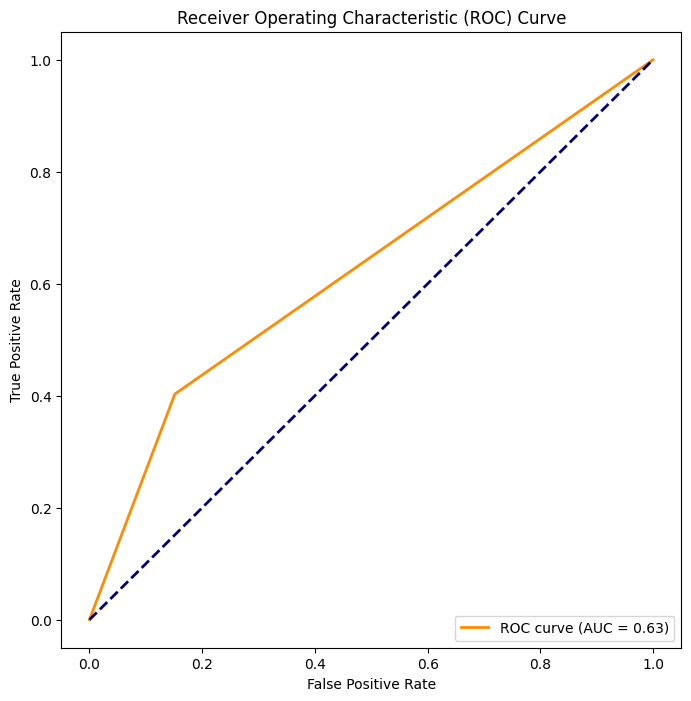

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# คำนวณ False Positive Rate และ True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, preds)

# คำนวณ Area Under the ROC Curve (AUC-ROC)
auc_score = auc(fpr, tpr)

# แสดง ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




---

